# Solaio a due campate
## *Matteo Franzoi* - Anno Accademico 2019/2020
### matricola 216006
---

In [1]:
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from sympy import MatrixSymbol, Matrix, linsolve
import numpy as np
from engineering_notation import EngNumber
from decimal import Decimal
import pandas as pd
from sklearn import datasets

import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'grid.color':'#D5D5D5',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': '#FEFCFB',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
q1 = Symbol('q1', positive=True);
q2 = Symbol('q2', positive=True);
q3 = Symbol('q3', positive=True);
q4 = Symbol('q4', positive=True);
q5 = Symbol('q5', positive=True);
q6 = Symbol('q6', positive=True);
#---------------------------------
ej = Symbol('ej', positive=True);
#---------------------------------
l1 = Symbol('l1', positive=True);
l2 = Symbol('l2', positive=True);
l3 = Symbol('l3', positive=True);
l4 = Symbol('l4', positive=True);
l5 = Symbol('l5', positive=True);
l6 = Symbol('l6', positive=True);
#---------------------------------
m1 = Symbol('m1');
m2 = Symbol('m2');
m3 = Symbol('m3');
m4 = Symbol('m4');
m5 = Symbol('m5');
m6 = Symbol('m6');
m7 = Symbol('m7');

In [3]:
L = [5, 4, 0, 0, 0, 0]

In [4]:
F = 1/(6*ej) * Matrix([
    [ 2*(l1 + l2), 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0]
])

In [5]:
Matrix(F)

Matrix([
[(2*l1 + 2*l2)/(6*ej), 0, 0, 0, 0],
[                   0, 0, 0, 0, 0],
[                   0, 0, 0, 0, 0],
[                   0, 0, 0, 0, 0],
[                   0, 0, 0, 0, 0]])

In [6]:
X = Matrix([ m2, m3, m4, m5, m6])
Matrix(X)

Matrix([
[m2],
[m3],
[m4],
[m5],
[m6]])

In [7]:
P = -1/(24*ej) * Matrix([
    q1*l1**3 + q2*l2**3,
    0,
    0,
    0,
    0
])
Matrix(P)

Matrix([
[-(l1**3*q1 + l2**3*q2)/(24*ej)],
[                             0],
[                             0],
[                             0],
[                             0]])

In [8]:
def rij_q(mij, mi_j, li, qi):
       return (mi_j - mij)/li + qi* li/2
    
def rij(mij, mi_j, li):
    return (mi_j-mij)/li 


In [9]:
# E = 31476 MPa

def EJ(b,h, E):
    """Concrete Rectangular Section:
    J = b * h^3 / 12 [mm^4]
    E = 31476 [MPa]
    Result in N*mm^2"""
    return E * b * h**3 /12
    
EJ = EJ(300, 500, 31476)/1000
print('EJ = ',EJ, 'kN mm^2 = ', Decimal(EJ).normalize().to_eng_string(),'kN mm^2')
EJ = EJ*10**-6 
print('EJ = ',EJ, 'kN m^2 = ', Decimal(EJ).normalize().to_eng_string(),'kN m^2')

EJ =  98362500000.0 kN mm^2 =  98.3625E+9 kN mm^2
EJ =  98362.5 kN m^2 =  98362.5 kN m^2


In [10]:
F1 = F.evalf(subs={l1:L[0], l2:L[1], l3:L[2], l4:L[3], l5:L[4], l6:L[5], ej:EJ})
Fn = F1;
F1

Matrix([
[3.04994281357225e-5, 0, 0, 0, 0],
[                  0, 0, 0, 0, 0],
[                  0, 0, 0, 0, 0],
[                  0, 0, 0, 0, 0],
[                  0, 0, 0, 0, 0]])

In [11]:
P1 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [L[0], L[1], L[2], L[3], L[4], L[5], EJ, 1, 0, 0, 0, 0, 0])))
P1

Matrix([
[-5.29503960689626e-5],
[                   0],
[                   0],
[                   0],
[                   0]])

In [12]:
sol1 = solve(F1 * X - P1, X)
X1 = list(sol1.values())
X1.insert(0, 0)
X1.insert(2, 0)
X1.insert(3, 0)
X1.insert(4, 0)
X1.insert(5, 0)
X1.insert(6, 0)
Matrix(X1)

Matrix([
[                0],
[-1.73611111111111],
[                0],
[                0],
[                0],
[                0],
[                0]])

In [13]:
R11 = rij_q(X1[0], X1[1], L[0], 1);
R21 = rij(X1[1], X1[2], L[1]);
R31 = rij(X1[2], X1[3], L[1]);
R41 = rij(X1[3], X1[4], L[1]);
R51 = rij(X1[4], X1[5], L[1]);
R61 = rij(X1[5], X1[6], L[1]);
R1 = np.array([R11, R21, R31, R41, R51, R61])
Matrix(R1)

Matrix([
[ 2.15277777777778],
[0.434027777777777],
[              0.0],
[              0.0],
[              0.0],
[              0.0]])

In [14]:
def H(s):
    if s <= 0:
        return 0
    else:
        return 1
Hv = np.vectorize(H)

In [15]:
s = np.arange(0, 9, .001)
M1 = (X1[0] + R1[0] * s - s**2 /2) * (Hv(s) - Hv(s-L[0])) + (X1[1] + R1[1]*(s-L[0])) * (Hv(s-L[0]) - Hv(s-(L[0]+L[1])))  #+ (X1[2] + R1[2]*(s-(L[0]+L[1])))*(Hv(s-(L[0]+L[1])) - Hv(s-(L[0]+L[1]+L[2]))) + (X1[3] + R1[3]*(s-(L[0]+L[1]+L[2])))* (Hv(s-(L[0]+L[1]+L[2])) - Hv(s-(L[0]+L[1]+L[2]+L[3]))) + (X1[4] + R1[4]*(s-(L[0]+L[1]+L[2]+L[3]))) * (Hv(s-(L[0]+L[1]+L[2]+L[3])) - Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4]))) + (X1[5] + R1[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4])) - Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4]+L[5])))

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


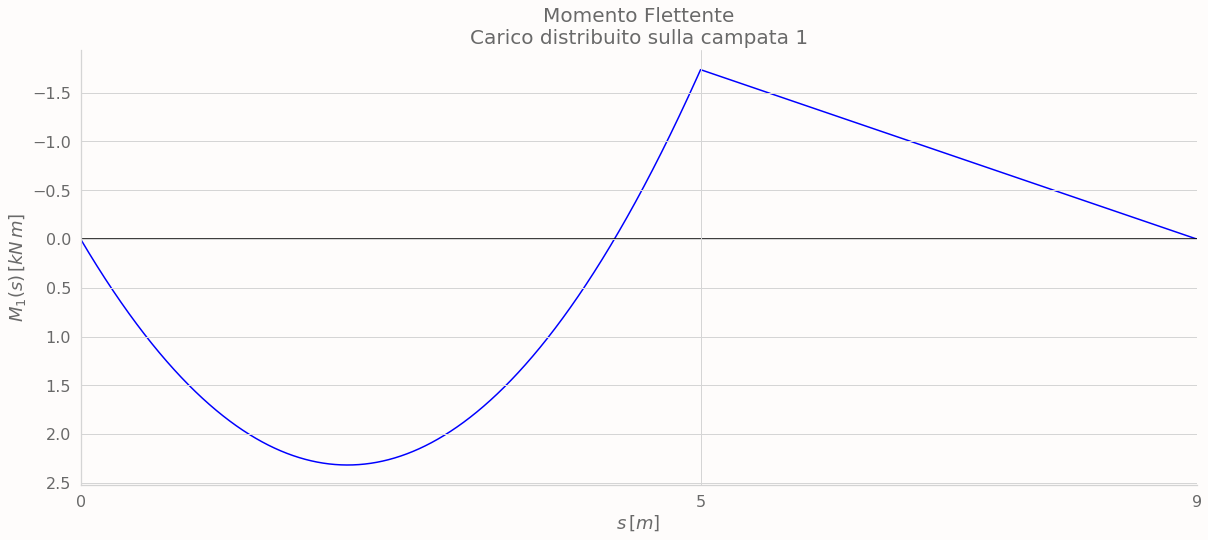

In [16]:
#----------PLOT------------------

plt.figure(figsize=(20,8))
plt.plot(s, M1, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$')
plt.ylabel(r'$M_1(s)\,[kN\,m]$',)
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks(fontsize='16')
plt.axhline(0, color='black')
plt.title('Momento Flettente\nCarico distribuito sulla campata 1')
plt.savefig('export/img/bendingMoment_loadSpan_1.pdf', bbox_inches='tight')
plt.show()


---
#### Load on Span 2

In [17]:
P2 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [L[0], L[1], L[2], L[3], L[4], L[5], EJ, 0, 1, 0, 0, 0, 0])))
P2

Matrix([
[-2.71106027873088e-5],
[                   0],
[                   0],
[                   0],
[                   0]])

In [18]:
sol2 = solve(Fn * X - P2, X)
X2 = list(sol2.values())
X2.insert(0, 0)
X2.insert(2, 0)
X2.insert(3, 0)
X2.insert(4, 0)
X2.insert(5, 0)
X2.insert(6, 0)
Matrix(X2)

Matrix([
[                 0],
[-0.888888888888886],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0]])

In [19]:
R12 = rij(X2[0], X2[1], L[0]);
R22 = rij_q(X2[1], X2[2], L[1], 1);
R32 = rij(X2[2], X2[3], 4);
R42 = rij(X2[3], X2[4], 5);
R52 = rij(X2[4], X2[5], 6.15);
R62 = rij(X2[5], X2[6], 4);
R2 = np.array([R12, R22, R32, R42, R52, R62])
Matrix(R2)

Matrix([
[-0.177777777777777],
[  2.22222222222222],
[               0.0],
[               0.0],
[               0.0],
[               0.0]])

In [20]:
s = np.arange(0, 9, .001)
M2 = (X2[0] + R2[0] * s) * (Hv(s) - Hv(s-L[0])) + (X2[1] + R2[1]*(s-L[0]) - 1*(s-L[0])**2 /2) * (Hv(s-L[0]) - Hv(s-(L[0]+L[1]))) + (X2[2] + R2[2]*(s-(L[0]+L[1])))*(Hv(s-(L[0]+L[1])) - Hv(s-(L[0]+L[1]+L[2]))) + (X2[3] + R2[3]*(s-(L[0]+L[1]+L[2])))* (Hv(s-(L[0]+L[1]+L[2])) - Hv(s-(L[0]+L[1]+L[2]+L[3]))) + (X2[4] + R2[4]*(s-(L[0]+L[1]+L[2]+L[3]))) * (Hv(s-(L[0]+L[1]+L[2]+L[3])) - Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4]))) + (X2[5] + R2[5]*(s-(L[0]+L[1]+L[2]+L[3]+L[4]))) * (Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4])) - Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4]+L[5])))

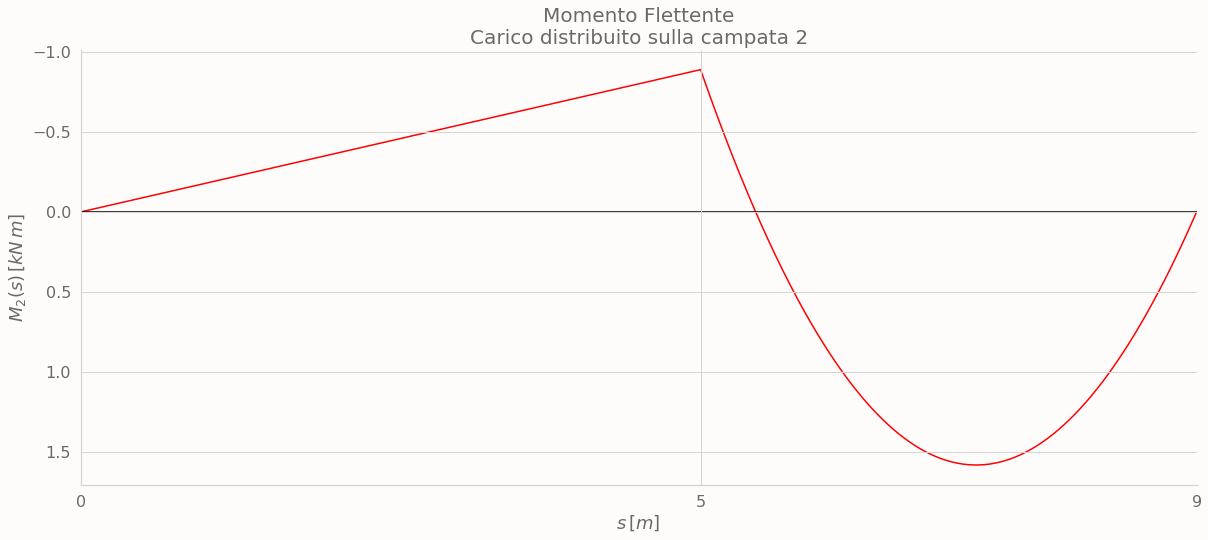

In [21]:
#----------PLOT------------------

plt.figure(figsize=(20,8))
plt.plot(s, M2, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$',)
plt.ylabel(r'$M_2(s)\,[kN\,m]$',)
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks(fontsize='16')
plt.axhline(0, color='black')
plt.title('Momento Flettente\nCarico distribuito sulla campata 2',)
plt.savefig('export/img/bendingMoment_loadSpan_2.pdf', bbox_inches='tight')
plt.show()


---
## SLU

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


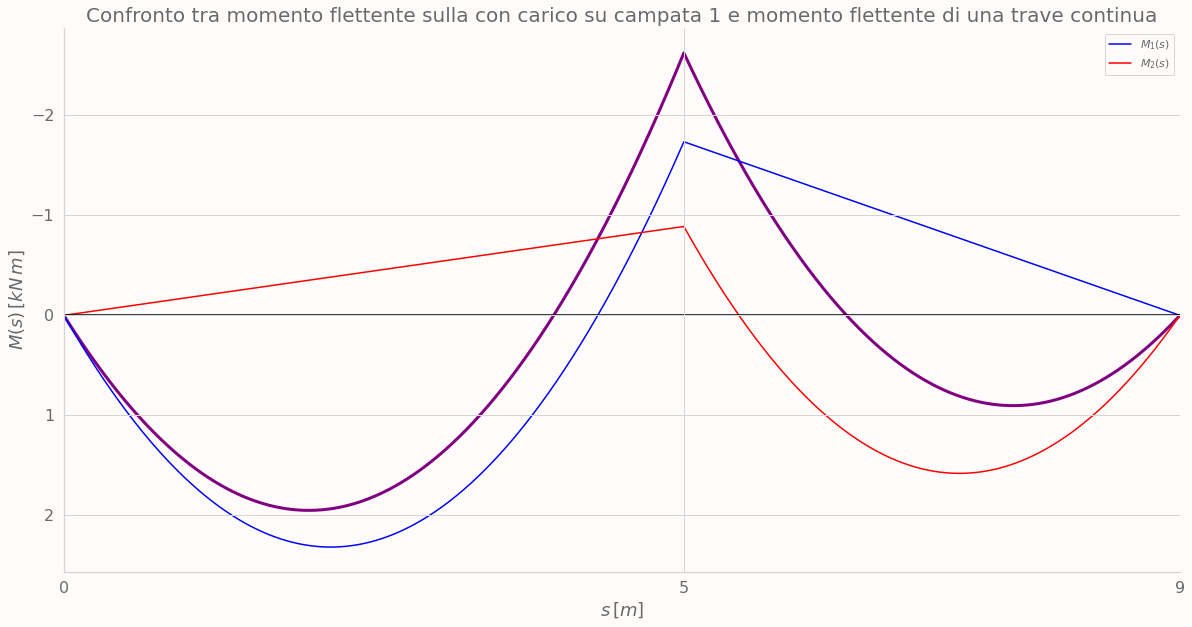

In [22]:
s = np.arange(0, L[0]+L[1], .001)

plt.figure(figsize=(20,10))

plt.plot(s, M1+M2, color='purple', linewidth='3')

plt.plot(s, M1, color='blue', label=r'$M_1(s)$')
plt.plot(s, M2, color='red', label=r'$M_2(s)$')
plt.xlim(s.min(), s.max())
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$')
plt.ylabel(r'$M(s)\,[kN\,m]$')
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks( fontsize='16')
plt.axhline(0, color='black')
plt.title('Confronto tra momento flettente sulla con carico su campata 1 e momento flettente di una trave continua')
plt.savefig('export/img/bendingMomentComp.pdf', bbox_inches='tight')
plt.show()

---
### CARICHI

In [23]:
Qmax = round(1.3*3.2+1.5*4.62+1.5*2, 1)
Qmin = round(1*3.2+.8*4.62+0*2, 1)

In [24]:
print(Qmax,'kN\n', Qmin, 'kN')

14.1 kN
 6.9 kN


---
### COMBINAZIONI

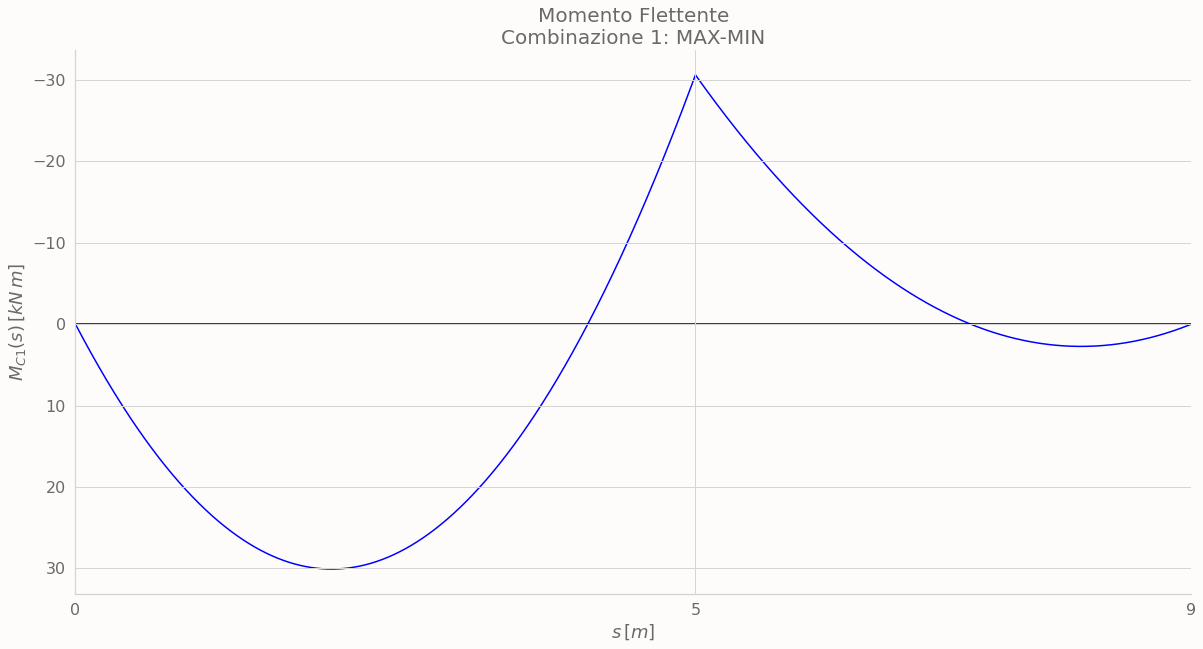

In [25]:
MC1 = M1*Qmax + M2*Qmin
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC1, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$',)
plt.ylabel(r'$M_{C1}(s)\,[kN\,m]$',)
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks( fontsize='16')
plt.axhline(0, color='black')
plt.title('Momento Flettente\nCombinazione 1: MAX-MIN')
plt.savefig('export/img/bendingMomentCombo_1.pdf', bbox_inches='tight')
plt.show()

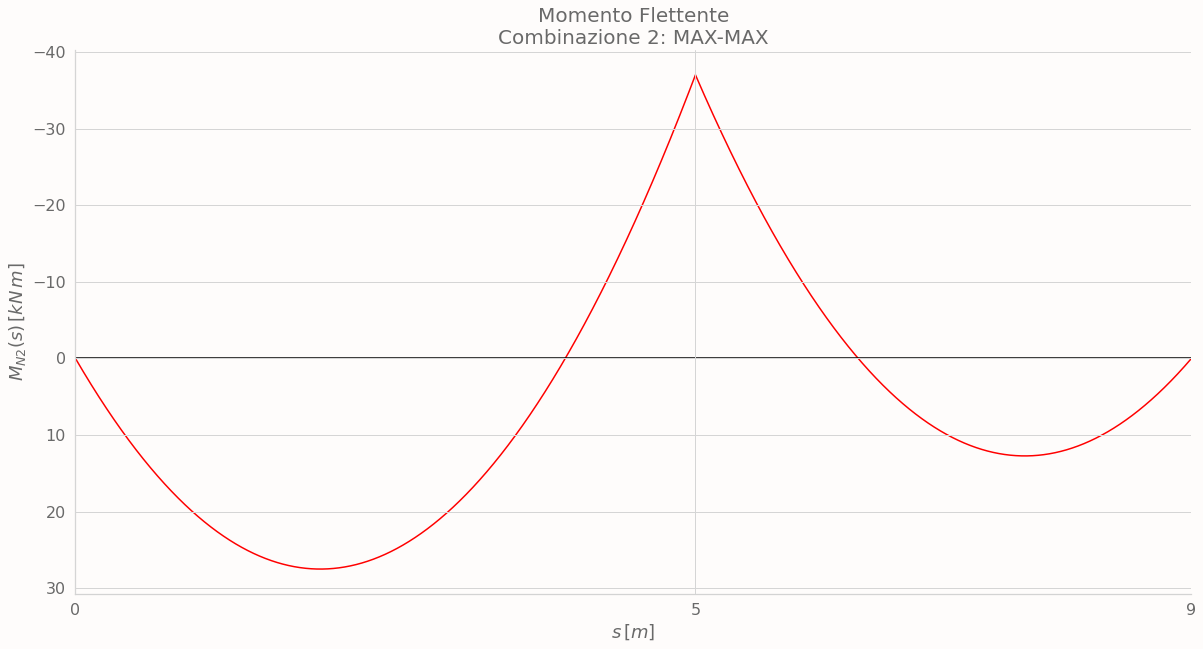

In [26]:
MN2 = M1*Qmax + M2*Qmax

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN2, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$',)
plt.ylabel(r'$M_{N2}(s)\,[kN\,m]$',)
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks( fontsize='16')
plt.axhline(0, color='black')
plt.title('Momento Flettente\nCombinazione 2: MAX-MAX')
plt.savefig('export/img/bendingMomentCombo_2.pdf', bbox_inches='tight')
plt.show()

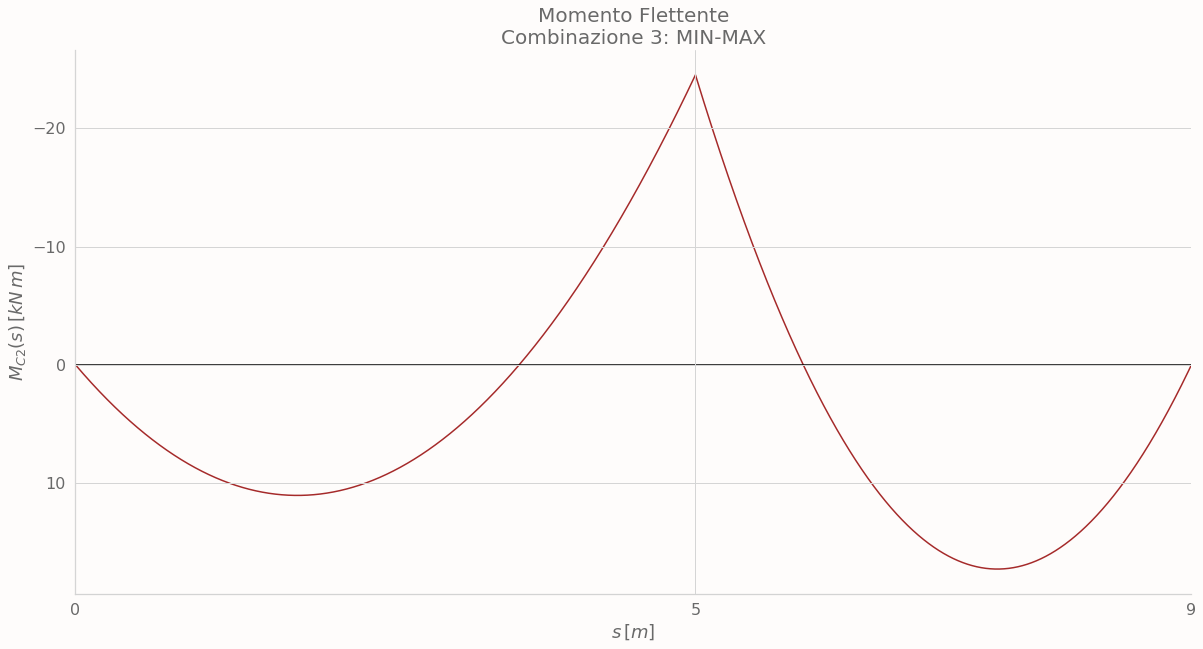

In [27]:
MC2 = M1*Qmin+ M2*Qmax

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC2, color='brown')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$',)
plt.ylabel(r'$M_{C2}(s)\,[kN\,m]$',)
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks( fontsize='16')
plt.axhline(0, color='black')
plt.title('Momento Flettente\nCombinazione 3: MIN-MAX')
plt.savefig('export/img/bendingMomentCombo_3.pdf', bbox_inches='tight')
plt.show()

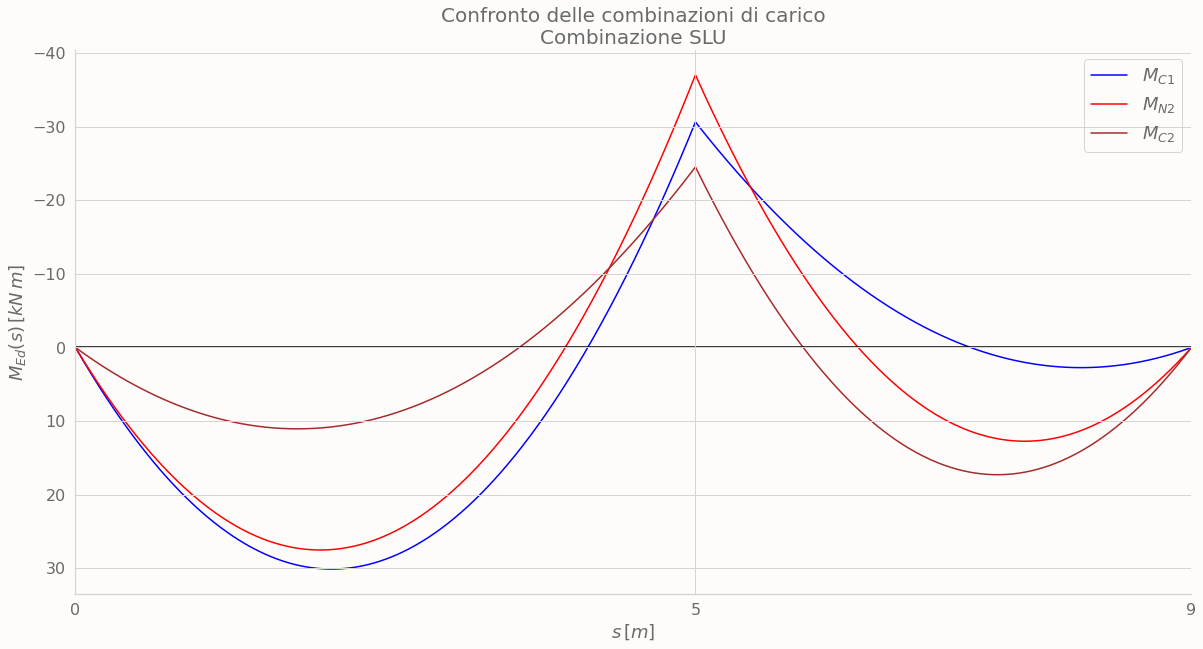

In [28]:
plt.figure(figsize=(20,10))
plt.plot(s, MC1, color='blue', label=r'$M_{C1}$')
plt.plot(s, MN2, color='red', label=r'$M_{N2}$')
plt.plot(s, MC2, color='brown', label=r'$M_{C2}$')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.legend(fontsize='18')
plt.grid()
plt.xlabel(r'$s\,[m]$',)
plt.ylabel(r'$M_{Ed}(s)\,[kN\,m]$',)
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks(fontsize='16')
plt.axhline(0, color='black')
plt.title('Confronto delle combinazioni di carico\nCombinazione SLU')
plt.savefig('export/img/bendingMomentComparison_slu.pdf', bbox_inches='tight')
plt.show()

In [29]:
def smax(MCimax):
    '''Input max value of bending moment on span i. Return s coordinate of max value '''
    imax = np.where(Mmax == MCimax)
    if s[imax][0] != 0:
        return s[imax][0]
    elif s[imax][0] == 0:
        return np.nan

def smin(MCimin):
    imin = np.where(Mmin == MCimin)
    if s[imin][0] != 0:
        return s[imin][0]
    elif s[imin][0] == 0:
        return np.nan

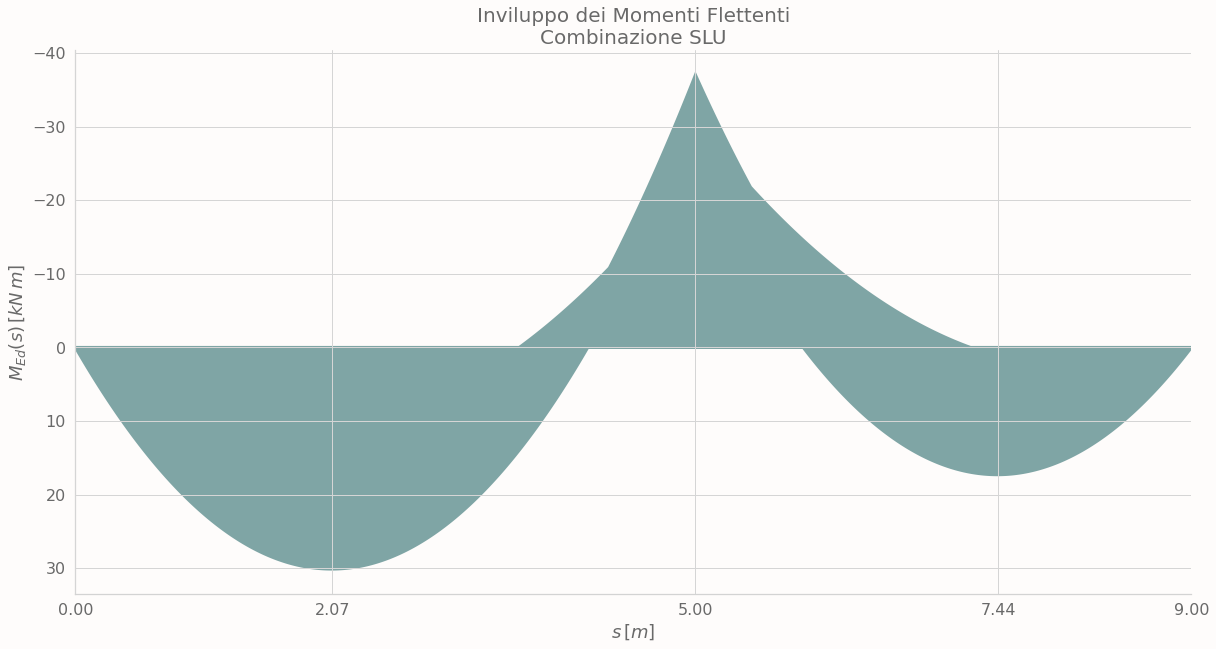

In [30]:
Mmax = np.zeros(len(s))
Mmin = np.zeros(len(s))

for i in range (0, len(s)-1):
    Mmax[i] = max(MC1[i], MN2[i], MC2[i])
    if Mmax[i] < 0:
        Mmax[i]=0
    Mmin[i] = min(MC1[i], MN2[i], MC2[i])
    if Mmin[i] > 0:
        Mmin[i]=0
# %store Mmax
# %store Mmin

# np.savetxt('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/Mmax_solaio.txt', Mmax, delimiter=',')#Linux
# np.savetxt('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/Mmin_solaio.txt', Mmin, delimiter=',')#Linux

# np.savetxt('C://Users/anzo5/TdC//Esercitazione//TdC//export//var//Mmax_solaio.txt', Mmax, delimiter=',')#Windows
# np.savetxt('C://Users/anzo5/TdC//Esercitazione//TdC//export//var//Mmin_solaio.txt', Mmin, delimiter=',')#Windows
        
#-------------------------------------
        
MC1max = max(Mmax[0:5000])
MN2min = min(Mmin[0:5000])
MC2max = max(Mmax[5000:9000])
MC2min = max(Mmin[5000:9000])

#-----------------------------------

sC1max = smax(MC1max)
sN2min = smin(MN2min)
sC2max = smax(MC2max)
sC2min = smin(MC2min)

#--------------------------------------

def bendingMomentPlot():
    plt.figure(figsize=(20,10))
    plt.fill(s, Mmax, linewidth='3', color='#7FA5A5')
    plt.fill(s, Mmin, linewidth='3', color='#7FA5A5')
    plt.xlim(s.min(), s.max())
    plt.gca().invert_yaxis()
    plt.grid()
    plt.xlabel(r'$s\,[m]$')
    plt.ylabel(r'$M_{Ed}(s)\,[kN\,m]$')
    plt.xticks([0, 5, 9,
    round(sC1max, 2), round(sC2max, 2)], fontsize='16')
    plt.yticks(fontsize='16')
    plt.title('Inviluppo dei Momenti Flettenti\nCombinazione SLU',)
    plt.savefig('export/img/bendingMomentEnvelopeSolaio_slu.pdf', bbox_inches='tight')
    return plt.show()

bendingMomentPlot()

In [31]:
MEd_slu = pd.DataFrame([
    ['Section','MEd+ [kN m]', 'smax [m]', 'MEd- [kN m]', 'smin [m]'],
    ['C1', MC1max, round(sC1max, 2), np.nan, np.nan],
    ['N2', np.nan, np.nan, MN2min, round(sN2min)], 
    ['C2', MC2max, round(sC2max, 2), MC2min, sC2min],
])
MEd_slu.columns = MEd_slu.iloc[0]
MEd_slu = MEd_slu.drop([0])
MEd_slu = MEd_slu.set_index('Section')
MEd_slu.to_latex('export/tab/bendingMoment_slu.tex')
%store MEd_slu
# MEd_slu.to_csv('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/MEdSolaio_slu.csv', sep=',')#Linux
# MEd_slu.to_csv('C://Users/anzo5/TdC//Esercitazione//TdC//export//var//MEdSolaio_slu.csv', sep=',')#Windows
# MEd_slu.to_latex('C://Users/anzo5/TdC//Esercitazione//TdC//export//tab//MEdSolaio_slu.tex')
# MEd_slu

Stored 'MEd_slu' (DataFrame)


---
## SHEAR

---
#### Load on Span 1

In [32]:
T1 = (R1[0] - 1 * s) * (Hv(s) - Hv(s-L[0])) + R1[1] * (Hv(s-L[0]) - Hv(s-(L[0]+L[1]))) + R1[2]*(Hv(s-(L[0]+L[1])) - Hv(s-(L[0]+L[1]+L[2])))+ R1[3]*(Hv(s-(L[0]+L[1]+L[2])) - Hv(s-(L[0]+L[1]+L[2]+L[3])))+ R1[4]*(Hv(s-(L[0]+L[1]+L[2]+L[3])) - Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4]))) +  R1[5]*(Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4])) - Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4]+L[5])))

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


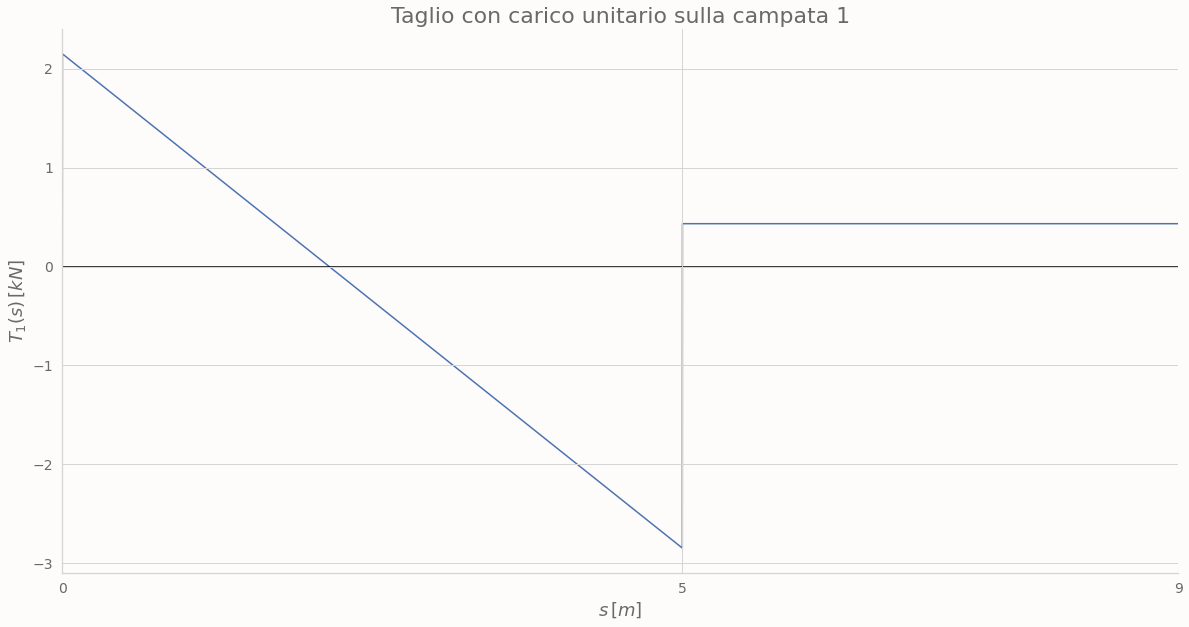

In [33]:
plt.figure(figsize=(20,10))
plt.plot(s, T1, )
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='18')
plt.ylabel(r'$T_1(s)\,[kN]$', fontsize='18')
plt.xticks([0, 5, 9], fontsize='14')
plt.yticks( fontsize='14')
plt.axhline(0, color='black')
plt.title('Taglio con carico unitario sulla campata 1', fontsize='22')
plt.show()


---
#### Load on Span 2

In [34]:
T2 = R2[0] * (Hv(s) - Hv(s-L[0])) + (R2[1] - 1*(s-L[0])) * (Hv(s-L[0]) - Hv(s-(L[0]+L[1]))) + R2[2]*(Hv(s-(L[0]+L[1])) - Hv(s-(L[0]+L[1]+L[2])))+ R2[3]*(Hv(s-(L[0]+L[1]+L[2])) - Hv(s-(L[0]+L[1]+L[2]+L[3])))+ R2[4]*(Hv(s-(L[0]+L[1]+L[2]+L[3])) - Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4]))) +  R2[5]*(Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4])) - Hv(s-(L[0]+L[1]+L[2]+L[3]+L[4]+L[5])))

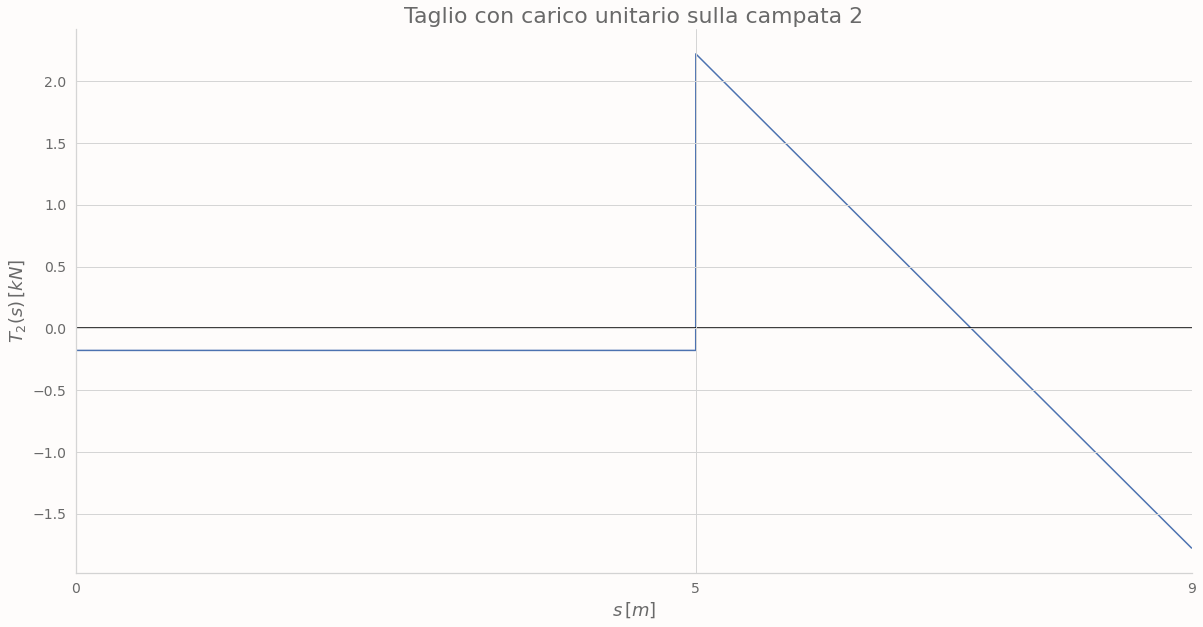

In [35]:
plt.figure(figsize=(20,10))
plt.plot(s, T2, )
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='18')
plt.ylabel(r'$T_2(s)\,[kN]$', fontsize='18')
plt.xticks([0, 5, 9], fontsize='14')
plt.yticks( fontsize='14')
plt.axhline(0, color='black')
plt.title('Taglio con carico unitario sulla campata 2', fontsize='22')
plt.show()


---
### COMBINAZIONI

TN1max =  29.11340000000001 kN 

TN2min =  -42.65249999999999 kN 

TN2max =  37.43902499999997 kN 

TN3min =  -22.043675000000007 kN 

TN3max =  0.7531249999999856 kN 



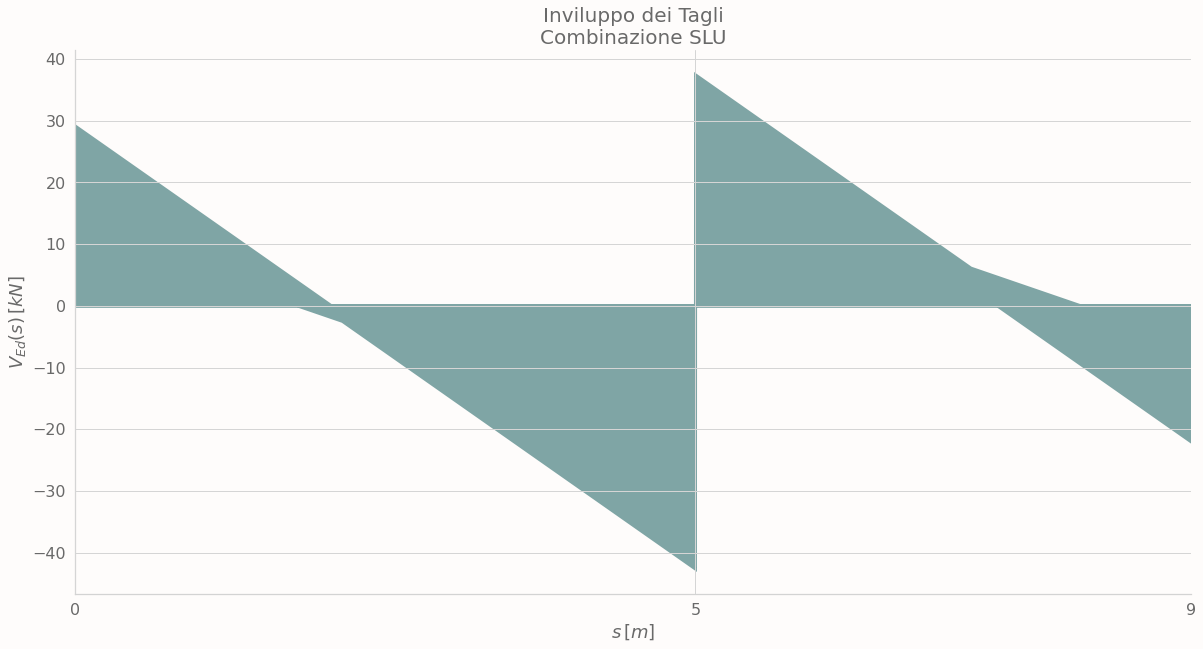

In [36]:
TN1 = T1*Qmax + T2*Qmin
TN2 = T1*Qmax + T2*Qmax
TN3 = T1*Qmin + T2*Qmax

#--------------------------------------------------------------------------------------------------

Tmax = np.zeros(len(s))
Tmin = np.zeros(len(s))
for i in range (0, len(s)-1):
    Tmax[i] = max(TN1[i], TN2[i], TN3[i])
    if Tmax[i] < 0:
        Tmax[i]=0
    Tmin[i] = min(TN1[i], TN2[i], TN3[i])
    if Tmin[i] > 0:
        Tmin[i]=0
# %store Tmax
# %store Tmin
#-------------------------------------------------------------------------------

TN1max = Tmax[1]
print('TN1max = ', TN1max, 'kN', '\n')

TN2min = min(Tmin[2000:5100])
print('TN2min = ', TN2min, 'kN', '\n')

TN2max = max(Tmax[2000:5100])
print('TN2max = ', TN2max, 'kN', '\n')

TN3min = min(Tmin[5500:9000])
print('TN3min = ', TN3min, 'kN', '\n')

TN3max = max(Tmax[8000:9000])
print('TN3max = ', TN3max, 'kN', '\n')

#-------------------------------------------------------------------------------

def shearPlot():
    plt.figure(figsize=(20,10))
    plt.fill(s, Tmax, linewidth='3', color='#7FA5A5')
    plt.fill(s, Tmin, linewidth='3', color='#7FA5A5')
    plt.xlim(s.min(), s.max())
    plt.grid()
    plt.xlabel(r'$s\,[m]$')
    plt.ylabel(r'$V_{Ed}(s)\,[kN]$')
    plt.xticks([0, 5, 9], fontsize='16')
    plt.yticks(fontsize='16')
    plt.title('Inviluppo dei Tagli\nCombinazione SLU')
    plt.savefig('export/img/shearEnvelopeSolaio_slu.pdf', bbox_inches='tight')
    return plt.show()

shearPlot()

In [37]:
TEd = pd.DataFrame([
    ['Section','VEd+ [kN]', 'smax [m]', 'VEd- [kN]', 'smin [m]'],
    ['N1', TN1max, 0, 0, 0],
    ['N2', TN2max, 5.0, TN2min, 5.0], 
    ['N3', TN3max, 9.0, TN3min, 9.0], 
])
TEd.columns = TEd.iloc[0]
TEd = TEd.drop([0])
TEd = TEd.set_index('Section')
TEd.to_latex('export/tab/shear_slu.tex')

# np.savetxt('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/VmaxSolaio.txt', Tmax, delimiter=',')#Linux
# np.savetxt('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/VminSolaio.txt', Tmin, delimiter=',')#Linux
# TEd.to_csv('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/VEdSolaio_slu.csv', sep=',')#Linux

# np.savetxt('C://Users/anzo5/TdC//Esercitazione//TdC//export//var//VmaxSolaio.txt', Tmax, delimiter=',')#Windows
# np.savetxt('C://Users/anzo5/TdC//Esercitazione//TdC//export//var//VminSolaio.txt', Tmin, delimiter=',')#Windows
# TEd.to_csv('C://Users/anzo5/TdC//Esercitazione//TdC//export//var//VEdSolaio_slu.csv', sep=',')#Windows

# %store TEd
# TEd.to_latex('C://Users/anzo5/TdC//Esercitazione//TdC//export//tab//VEdSolaio_slu.tex')
TEd

0       VEd+ [kN] smax [m] VEd- [kN] smin [m]
Section                                      
N1        29.1134        0         0        0
N2         37.439        5  -42.6525        5
N3       0.753125        9  -22.0437        9

---
## Progetto agli SLU

In [38]:
ceiling(1/25 * (max(L[0]*1000, L[1]*1000)))

200

In [39]:
H = 240;
ss = 40; 
B = 500;
b = 120;
d1 = 40;
d = H-d1;

gammac = 1.5;
gammas = 1.15;
fck = 25;
fcm = fck + 8;
Ecm = 22000*(fck/10)**(1/3);
fctm = .3*fck**(2/3);
fctk005 = .7*fctm;
Ecm = ceiling(Ecm/10)*10
epsiloncu = 3.5/1000;
epsilonc2 = 2/1000;

alphacc = .85;
fcd = round(fck*alphacc /gammac,2)
fctd = round(fctk005/gammac,2)


fyk = 450;
fyd = round(fyk/gammas,1)
epsilonsu = 10/1000;
Es = 210*10**3;
epsilonse = round(fyd/Es, 6)


In [40]:
MEd = np.array([30.0624, 36.9436, 17.2599])
Matrix(MEd)
#Per un metro di solaio!

Matrix([
[30.0624],
[36.9436],
[17.2599]])

In [41]:
smax = np.array([2.07, 5, 7.44])*1000 #mm
Matrix(smax)

Matrix([
[2070.0],
[5000.0],
[7440.0]])

In [42]:
VEd = np.array([29.0919,-42.6222, 37.4125, 22.0259])
Matrix(VEd) #kN

Matrix([
[ 29.0919],
[-42.6222],
[ 37.4125],
[ 22.0259]])

In [43]:
MEdt = MEd *.5
Matrix(MEdt)
#per un travetto

Matrix([
[15.0312],
[18.4718],
[8.62995]])

---
# Flessione
## Campata C1
### Progetto

In [44]:
d1c1 = 40
dc1 = H - d1c1
dc1

200

Si fa l'ipotesi di asse neutro che taglia l'ala e di
$$
\varepsilon_c \in [\varepsilon_{c2}, \varepsilon_{cu}]
$$
perciò usando il legame costitutivo parabola esponenzial rettangolo si ha che
$$
\psi = \dfrac{16\,\xi -1}{15\xi}
$$
e
$$
\lambda = \dfrac{(6 \varepsilon_{su}^2 + 4 \varepsilon_{su}\,\varepsilon_{c2} + \varepsilon_{c2}^2)\,\xi^2 - 2\varepsilon_{c2}^2\,\xi + \varepsilon_{c2}^2 - 4\varepsilon_{su}\,\varepsilon_{c2}\,\xi}{4\varepsilon_{su}\,\xi[(3\varepsilon_{su} + \varepsilon_{c2})\,\xi - \varepsilon_{c2}]} = \dfrac{171\xi^2 - 22\xi +1}{20\xi\,(16\xi-1)}
$$

Dall'equilibrio alla rotazione attorno a $T_s$ si ricava $\xi$

In [45]:
As = Symbol ('As')
xi = Symbol('xi')
epsilonc = Symbol('epsilonc')

psi2 = (5*xi*(3-8*xi))/(3*(xi-1)**2)
lambda2 = (9*xi-4)/(4*(8*xi-3))

In [46]:
# solve(B*psi2*xi*dc1*fcd - As*fyd, xi)[0]
xid =re(solve(B*psi2*xi*dc1*fcd *(dc1-lambda2*xi*dc1) - MEdt[0]*10**6, xi)[1])
xid

0.111384628383979

In [48]:
solve((B * psi2 * xid*dc1*fcd - As*fyd).subs({xi:xid}), As)[0]

199.982662905674

In [49]:
solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0]

1.25346276850260

Dall'equilibrio alla traslazione si ricava $A_s$

Considerando dei $\Phi 12mm$
$$
A_s = 2\Phi 12\,mm = 226.195\,mm^2 = 72\pi\,mm^2
$$

In [50]:
Phic1 = 12;
Asc1 = 2*math.pi*Phic1**2 /4
Asc1

226.1946710584651

Verifichiamo se le barre stanno sulla base $b$ della sezione

In [51]:
2*Phic1 + 1 * 25 + 2 * 10 < b

True

### Verifica
Verifichiamo se l'asse neutro taglia l'ala

In [52]:
psi2 = (5*xi*(3-8*xi))/(3*(xi-1)**2)
lambda2 = (9*xi-4)/(4*(8*xi-3))

xic1 = re(solve((B*psi2*xi*dc1*fcd - Asc1*fyd), xi)[1])

print(xic1,'\n',xic1 * dc1, '<', ss, xic1 * dc1<ss)

0.119197747785953 
 23.8395495571907 < 40 True


L'ipotesi di asse neutro che taglia l'ala è corretta.  
La deformazione del calcestruzzo superiore è

In [53]:
solve((epsilonc + 10)/dc1 - epsilonc/(xic1*dc1), epsilonc)[0]

1.35328613756753

che è coerente con le ipotesi di  $\varepsilon_{c} < \varepsilon_{c2}$

In [54]:
psic1 = psi2.subs({xi:xic1})
lambdac1 = lambda2.subs({xi:xic1})

print(psic1, lambdac1)

0.524027787939396 0.357602924303641


Il momento resistente vale

In [55]:
MRdc1 = B*psic1*xic1*dc1*fcd*(dc1-lambdac1*xic1*dc1)/10**6
MRdc1

16.9474392228054

In [56]:
MRdc1 > MEdt[0]

True

---
## Nodo N2
### Progetto
La sezione è invertita e le ali sono in trazione. Assumendo la resistenza a trazione del cls nulla, si ottiene una sezione rettangolare.

In [57]:
MEdt[1]

18.4718

In [58]:
d1n2 = 40;
dn2 = H - d1n2
dn2

200

Si fa l'ipotesi di campo 3 perciò
$$
\psi = 0.80952
$$
$$
\lambda = 0.416$$


In [59]:
As = Symbol ('As')
xi = Symbol('xi')
epsilonc = Symbol('epsilonc')
epsilons = Symbol('epsilons')

psi3 = .80952
lambda3 = .416

In [60]:
eq1 = solve(b*psi3*xi*dc1*fcd - As*fyd, xi)[0]
As0 = re(solve((As*fyd*(dc1-lambda3*xi*dc1) - MEdt[1]*10**6).subs({xi:eq1}))[0])
xid=re(eq1.subs({As:As0}))
print(xid,'\n', As0)

0.403067952768566 
 283.580978349352


In [61]:
solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0]
print(solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0], '> 2.0', solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0] > 2.0,'\n',
solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0], '< 3.5', solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0] <3.5 )


6.75232557270115 > 2.0 True 
 6.75232557270115 < 3.5 False


L'ipotesi di armature inferiori a collasso non è corretta. La deformazione delle armature è

In [62]:
solve((3.5 + epsilons)/dn2 - epsilons/(dn2 - xid*dn2), epsilons)[0]


5.18339935229144

Le armature sono comunque snervate
$$
\sigma_s = f_{yd}
$$

In [63]:
solve((b * psi3 * xid*dn2*fcd - As*fyd).subs({xi:xid}), As)[0]

283.580978349351

Considerando dei $\Phi 12mm$
$$
A_s = 3\Phi 12\,mm = 339.292\,mm^2 = 108\pi\,mm^2
$$

In [64]:
Phin2 = 12;
Asn2 = 3*math.pi*Phin2**2 /4
Asn2

339.29200658769764

Verifichiamo se le barre stanno sulla base $b$ della sezione

In [65]:
3*Phin2 + 2 * 25 + 2 * 10 <b

True

### Verifica

Ipotizziamo di essere in campo 3. L'asse neutro allora

In [66]:
xin2 = solve((b*psi3*xi*dn2*fcd - Asn2*fyd), xi)[0]
print(xin2,'\n', xin2* dc1, '<', ss, xin2 * dc1<ss)

0.482252848135555 
 96.4505696271111 < 40 False


L'asse neutro si trova circa a metà sezione

In [67]:
solve((epsilons + 3.5)/dn2 - epsilons/(dn2 - xin2*dn2), epsilons)[0]/1000

0.00375760358602630

che è maggiore di $0.1863\%$

In [68]:
psin2 = psi3
lambdan2 = lambda3

print(psin2, lambdan2)

0.80952 0.416


Il momento resistente vale

In [69]:
MRdn2 = b*psin2*xin2*dn2*fcd*(dn2-lambdan2*xin2*dn2)/10**6
MRdn2

21.2260058444692

In [70]:
MEdt[1]

18.4718

In [71]:
MRdn2 > MEdt[1]

True

---
## Campata C2
### Progetto
La sezione è nuovamente a **T**. Ipotizziamo di essere in campo 2 e verifichiamo se l'asse neutro taglia l'ala

In [72]:
MEdt[2]

8.62995

In [73]:
d1c2 = 40;
dc2 = H - d1c2
dc2

200

Si fa l'ipotesi di
$$
\varepsilon_c \in [\varepsilon_{c2}, \varepsilon_{cu}]
$$
perciò usando il legame costitutivo parabola esponenzial rettangolo si ha che
$$
\psi = \dfrac{16\,\xi -1}{15\xi}
$$
e
$$
\lambda = \dfrac{(6 \varepsilon_{su}^2 + 4 \varepsilon_{su}\,\varepsilon_{c2} + \varepsilon_{c2}^2)\,\xi^2 - 2\varepsilon_{c2}^2\,\xi + \varepsilon_{c2}^2 - 4\varepsilon_{su}\,\varepsilon_{c2}\,\xi}{4\varepsilon_{su}\,\xi[(3\varepsilon_{su} + \varepsilon_{c2})\,\xi - \varepsilon_{c2}]} = \dfrac{171\xi^2 - 22\xi +1}{20\xi\,(16\xi-1)}
$$

Dall'equilibrio alla rotazione attorno a $T_s$ si ricava $\xi$

In [74]:
As = Symbol ('As')
xi = Symbol('xi')
epsilonc = Symbol('epsilonc')

psi2 = (16*xi -1)/(15*xi)
lambda2 = (171*xi**2 -22*xi +1)/(20*xi*(16*xi-1))

In [75]:
xid = re((solve(B * psi2 *xi*dc2 * fcd*(dc2-lambda2*xi*dc2) - MEdt[2]*10**6, xi))[0])
xid

0.0923826082444579

In [76]:
print(xid * d,'<', ss, xid*d<ss)

18.4765216488916 < 40 True


L'asse neutro è molto alto

In [77]:
solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0]
print(solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0], '> 2.0', solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0] > 2.0,'\n',
solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0], '< 3.5', solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0] <3.5 )


1.01785850605803 > 2.0 False 
 1.01785850605803 < 3.5 True


L'ipotesi di $\varepsilon_c$ non è corretta

In [78]:
psi2 = (5*xi*(3-8*xi))/(3*(xi-1)**2)
lambda2 = (9*xi-4)/(4*(8*xi-3))

xid = re((solve(B * psi2 *xi*dc2 * fcd*(dc2-lambda2*xi*dc1) - MEdt[2]*10**6, xi))[1])
xid

0.0822460158241474

In [79]:
solve((10+epsilonc)/dc1 - epsilonc/(xid*dc1), epsilonc)[0]

0.896166262879313

Ok, è coerente con le ipotesi.

Dall'equilibrio alla traslazione si ricava $A_s$

In [80]:
solve((B * psi2 * xid*dc2*fcd - As*fyd).subs({xi:xid}), As)[0]

113.521660242459

Considerando dei $\Phi 12mm$
$$
A_s = 2\Phi 12\,mm = 226.195\,mm^2 = 72\pi\,mm^2
$$

In [81]:
Phic2 = 12;
Asc2 = 2*math.pi*Phin2**2 /4
Asc2

226.1946710584651

Verifichiamo se le barre stanno sulla base $b$ della sezione

In [82]:
2*Phin2 + 1 * 25 + 2 * 10 < b

True

### Verifica
Verifichiamo se l'asse neutro taglia l'ala

In [83]:
psi2 = (5*xi*(3-8*xi))/(3*(xi-1)**2)
lambda2 = (9*xi-4)/(4*(8*xi-3))

xic2 = re(solve((B*psi2*xi*dc2*fcd - Asc2*fyd), xi)[1])
print(xic2,'\n', xic2* dc1, '<', ss, xic2 * dc1<ss)

0.119197747785953 
 23.8395495571907 < 40 True


In [84]:
solve((epsilonc + 10)/dc1 - epsilonc/(xic2*dc2), epsilonc)[0]

1.35328613756753

che è minore del 2 per mille.
Allora

In [85]:
psic2 = psi2.subs({xi:xic2})
lambdac2 = lambda2.subs({xi:xic2})

print(psic2, lambdac2)

0.524027787939396 0.357602924303641


Il momento resistente vale

In [86]:
MRdc2 = B*psic2*xic2*dc2*fcd*(dc2-lambdac2*xic2*dc2)/10**6
MRdc2

16.9474392228054

In [87]:
MEdt[2]

8.62995

In [88]:
MRdc2 > MEdt[2]

True

In [89]:
smax

array([2070., 5000., 7440.])

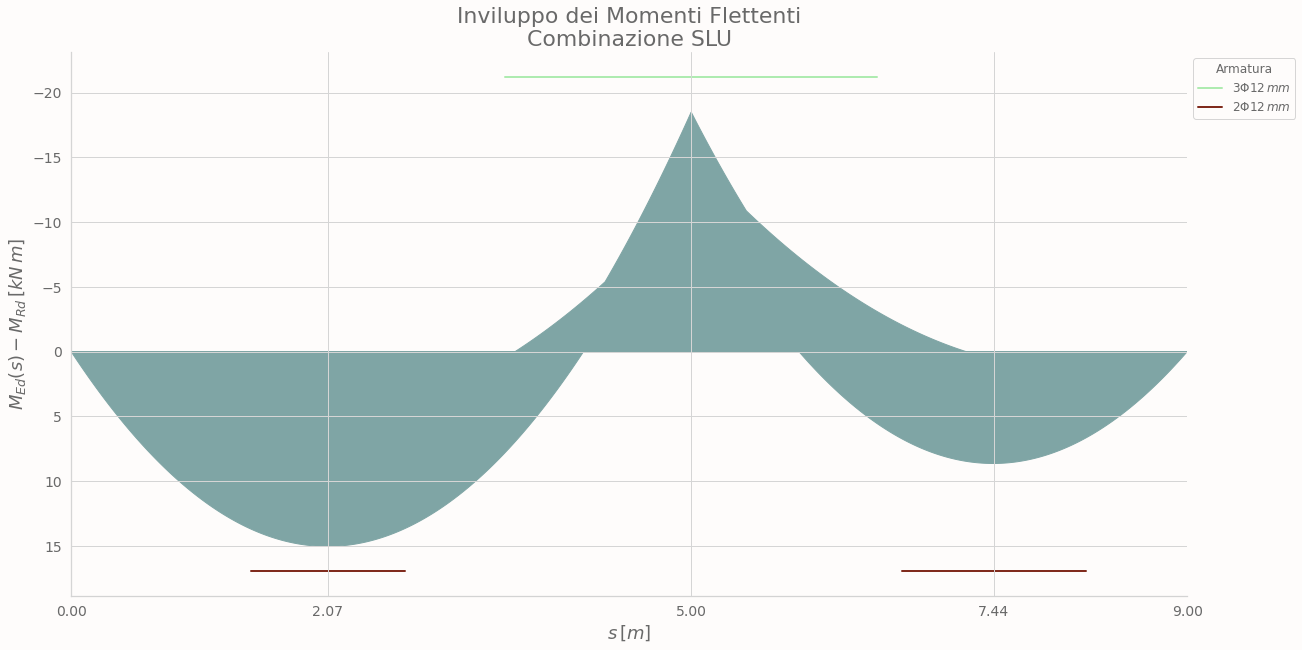

In [93]:
plt.figure(figsize=(20,10))
plt.fill(s, Mmax/2, color='#7FA5A5')
plt.fill(s, Mmin/2, color='#7FA5A5')

plt.plot(smax[0]*10**-3 * np.array([.7, 1.3]), MRdc1*np.ones(2), color='#802B1D', linewidth='2')
plt.plot(smax[1]*10**-3 * np.array([.7, 1.3]), - MRdn2*np.ones(2), color='#AEEBB0', label=r'$3\Phi 12\,mm$', linewidth='2')
plt.plot(smax[2]*10**-3 * np.array([.9, 1.1]), MRdc2*np.ones(2), color='#802B1D', label=r'$2\Phi 12\,mm$', linewidth='2')

plt.legend(loc='best', bbox_to_anchor=(1, 1, 0,0), title='Armatura', fontsize=12)
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='18')
plt.ylabel(r'$M_{Ed}(s) - M_{Rd}\,[kN\,m]$', fontsize='18')
plt.xticks([0, 5, 9,
round(sC1max, 2), round(sC2max, 2)], fontsize='14')
plt.yticks(fontsize='14')
plt.title('Inviluppo dei Momenti Flettenti\nCombinazione SLU', fontsize='22')
plt.savefig('export/img/MEd-MRd_solaio.pdf', bbox_inches='tight')
plt.show()

---
## Verifiche sulle armature

In [109]:
Asmin = max(.26*fctm/fyk *b*dc1, .0013*b*dc1)
Asmin

35.567499690875295

In [110]:
Asmax = .04*(b*(H-ss)+B*ss)
Asmax

1760.0

---
# Traslazione diagramma dei momenti flettenti

In [111]:
s = np.arange(0, L[0]+L[1], .001)


In [112]:
sdp = np.arange(0, L[0]+L[1], .001)
sdm = np.arange(0, L[0]+L[1], .001)

supp = np.arange(0, L[0]+L[1], .001)
supm = np.arange(0, L[0]+L[1], .001)

for i in range (2070, 5000):
    sdp[i] = s[i] + .9*d/1000
    supm[i] = s[i] - .9*d/1000
    
for i in range (5000, 7440):
    sdp[i] = s[i]
    sdm[i] = s[i] - .9*d/1000
    supp[i] = s[i] + .9*d/1000

    
# for i in range ()

In [113]:
d/1000 *.9

0.18000000000000002

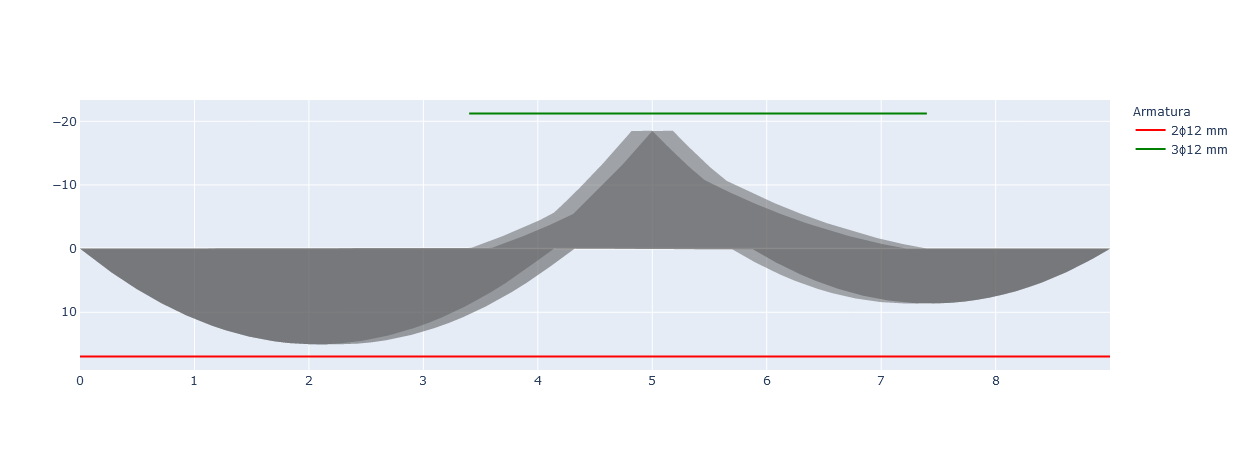

In [114]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = sdp,
    y = Mmax/2,
    fill='tozeroy',
    fillcolor='rgba(70,70,70,.5)',
    line_color='rgba(70,70,70,0)',
    name='Mmax',
    showlegend=False,
))
    
fig.add_trace(go.Scatter(
    x = sdm,
    y = Mmax/2,
    fill='tozeroy',
    fillcolor='rgba(90,90,90,.5)',
    line_color='rgba(70,70,70,0)',
    name='Mmax',
    showlegend=False,
)) 

fig.add_trace(go.Scatter(
    x = supm,
    y = Mmin/2,
    fill='tozeroy',
    fillcolor='rgba(90,90,90,.5)',
    line_color='rgba(70,70,70,0)',
    name='Mmin',
    showlegend=False,
))

fig.add_trace(go.Scatter(
    x = supp,
    y = Mmin/2,
    fill='tozeroy',
    fillcolor='rgba(90,90,90,.5)',
    line_color='rgba(70,70,70,0)',
    name='Mmin',
    showlegend=False,
))

fig.add_trace(go.Scatter(
    x = s,
    y = float(MRdc1)*np.ones(len(s)), 
    line_color='red',
    name='2ϕ12 mm',
))

# fig.add_trace(go.Scatter(
#     x = np.arange(0, 4.75, .001),
#     y = -float(MRdc2)*np.ones(len(s)),
#     line_color='red',
#     name='2ϕ12 mm',
#     showlegend=False,
# ))

# fig.add_trace(go.Scatter(
#     x = np.arange(5.26, 9, .001),
#     y = -float(MRdc2)*np.ones(len(s)),
#     line_color='red',
#     name='2ϕ12 mm',
#     showlegend=False,
# ))

fig.add_trace(go.Scatter(
    x = np.arange(3.4, 7.4, .001),
    y = -float(MRdn2)*np.ones(len(s)),
    line_color='green',
    name='3ϕ12 mm',
))

fig.update_traces(mode='lines')
fig.update_yaxes(autorange='reversed')
fig.update_layout(legend_title_text='Armatura',
                 )

fig.show()

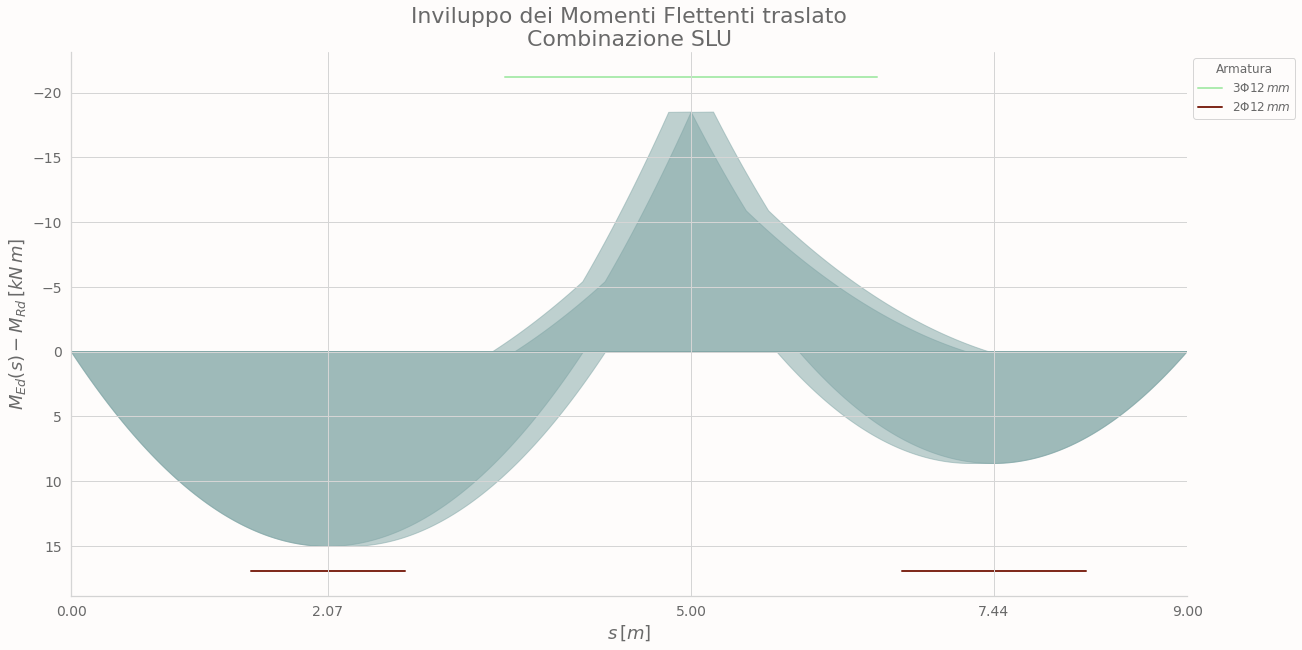

In [115]:
plt.figure(figsize=(20,10))
plt.fill(sdp, Mmax/2, color='#7FA5A580')
plt.fill(sdm, Mmax/2, color='#7FA5A580')
# plt.fill(s, Mmax, color='g')

plt.fill(supm, Mmin/2, color='#7FA5A580')
plt.fill(supp, Mmin/2, color='#7FA5A580')
# plt.fill(s, Mmin, color='g')

plt.plot(smax[0]*10**-3 * np.array([.7, 1.3]), MRdc1*np.ones(2), color='#802B1D', linewidth='2')
plt.plot(smax[1]*10**-3 * np.array([.7, 1.3]), - MRdn2*np.ones(2), color='#AEEBB0', label=r'$3\Phi 12\,mm$', linewidth='2')
plt.plot(smax[2]*10**-3 * np.array([.9, 1.1]), MRdc2*np.ones(2), color='#802B1D', label=r'$2\Phi 12\,mm$', linewidth='2')

plt.legend(loc='best', bbox_to_anchor=(1, 1, 0,0), title='Armatura', fontsize=12)
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='18')
plt.ylabel(r'$M_{Ed}(s) - M_{Rd}\,[kN\,m]$', fontsize='18')
plt.xticks([0, 5, 9,
round(sC1max, 2), round(sC2max, 2)], fontsize='14')
plt.yticks(fontsize='14')
plt.title('Inviluppo dei Momenti Flettenti traslato\nCombinazione SLU', fontsize='22')
plt.savefig('export/img/MEd-MRd_traslato_solaio.pdf', bbox_inches='tight')
plt.show()

---
## Lunghezza di ancoraggio

In [116]:
Phi = Symbol('Phi')
f_bd = Symbol('f_bd')
eta1, eta2, fctd, alphact = symbols('eta1, eta2, fctd, alphact')

lbrqd = Phi/4 * fyd/f_bd
lbrqd

97.825*Phi/f_bd

In [117]:
fctk005 = .7*fctm
alphact = .85

fctd = alphact * fctk005 / gammac
fctd

1.0174356882726345

In [118]:
fbd = 2.25 * eta1 * eta2 * fctd
fbd = round(fbd.subs({eta1:1, eta2:1}),1)
fbd

2.3

In [119]:
lbrqd = lbrqd.subs({Phi:max(Phic1, Phic2, Phin2), eta1:1, eta2:1,f_bd:fbd})
lbrqd

510.142089843750

In [120]:
lbmin = max(.3*lbrqd, 10*max(Phic1, Phic2, Phin2), 100) #barre tese
lbmin

153.042626953125

In [121]:
max(.6*lbrqd, 10*max(Phic1, Phic2, Phin2), 100) #barre compresse

306.085253906250

In [122]:
lbd =floor( 1 * 1 * 1 * 1 * 1* 1 * lbrqd)
lbd

510

In [123]:
lbd > lbmin

True

Allora la lunghezza di ancoraggio è

In [124]:
lbd = ceiling(lbd/10)*10
lbd

510

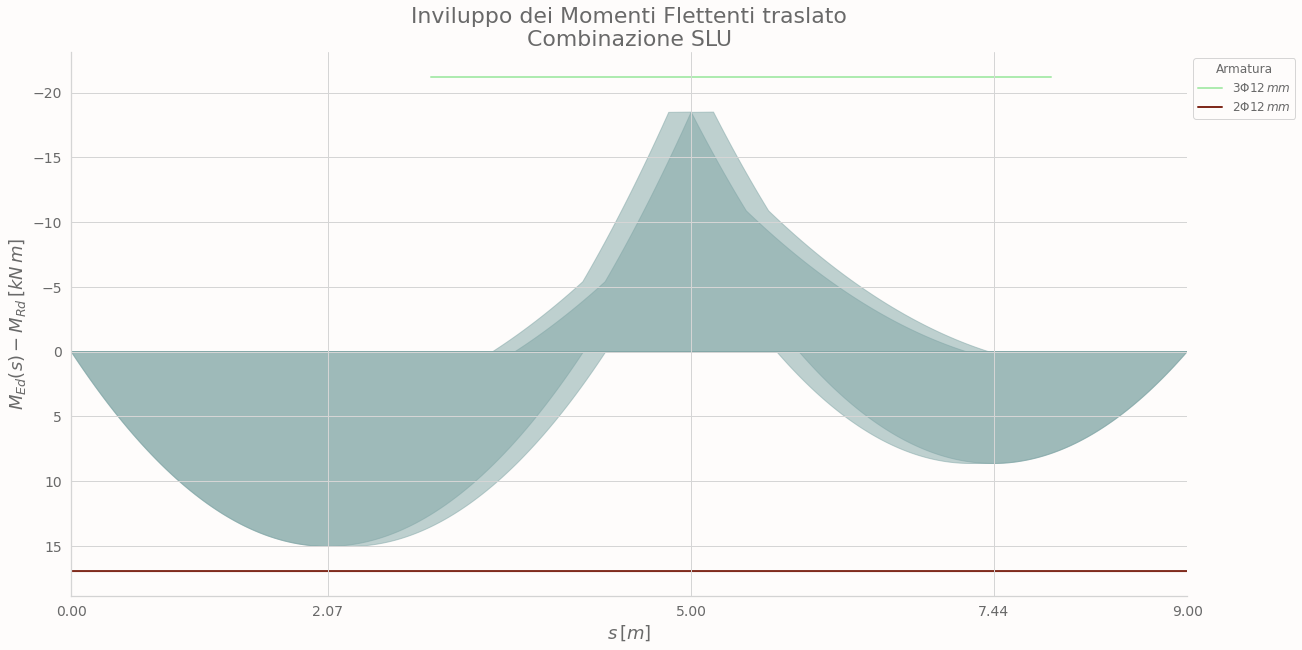

In [125]:
plt.figure(figsize=(20,10))
plt.fill(sdp, Mmax/2, color='#7FA5A580')
plt.fill(sdm, Mmax/2, color='#7FA5A580')
# plt.fill(s, Mmax, color='g')

plt.fill(supm, Mmin/2, color='#7FA5A580')
plt.fill(supp, Mmin/2, color='#7FA5A580')
# plt.fill(s, Mmin, color='g')

plt.plot([2.9, 7.9], - MRdn2*np.ones(2), color='#AEEBB0', label=r'$3\Phi 12\,mm$', linewidth='2')
plt.plot(s, MRdc2*np.ones(len(s)), color='#802B1D', label=r'$2\Phi 12\,mm$', linewidth='2')

plt.legend(loc='best', bbox_to_anchor=(1, 1, 0,0), title='Armatura', fontsize=12)
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='18')
plt.ylabel(r'$M_{Ed}(s) - M_{Rd}\,[kN\,m]$', fontsize='18')
plt.xticks([0, 5, 9,
round(sC1max, 2), round(sC2max, 2)], fontsize='14')
plt.yticks(fontsize='14')
plt.title('Inviluppo dei Momenti Flettenti traslato\nCombinazione SLU', fontsize='22')
plt.savefig('export/img/MEd-MRd_ancoraggi_solaio.pdf', bbox_inches='tight')
plt.show()

---
## Armatura integrativa agli appoggi esterni

In [126]:
Qt = Qmax/2
Qt

7.05

Momento sollecitante agli appoggi esterni
$$
M_{Ed} = \dfrac{Q_{Ed,slu}\,l^2}{16\div 20}
$$

In [127]:
MN1 = Qt*L[0]**2 /16
MN1

11.015625

In [128]:
MN3 = Qt*L[1]**2 /16
MN3

7.05

### NS1

In [129]:
As = Symbol ('As')
xi = Symbol('xi')
epsilonc = Symbol('epsilonc')
psi2 = (5*xi*(3-8*xi))/(3*(xi-1)**2)
lambda2 = (9*xi-4)/(4*(8*xi-3))

xid=re(solve(b*psi2*xi*dc1*fcd*(dc1-lambda2*xi*dc1) - MN1*10**6,xi)[1])
xid

0.241836110460332

La deformazione del calcestruzzo

In [130]:
solve((10)/(dc1-xid*dc1) - epsilonc/(xid*dc1), epsilonc)

[3.18976033806050]

Non compatibile con l'ipotesi. Calcestruzzo in campo 2 con 
$$
\epsilon_c \in [\epsilon_{c2}, \epsilon_{cu}]
$$

In [131]:
As = Symbol ('As')
xi = Symbol('xi')
epsilonc = Symbol('epsilonc')

psi2 = (16*xi -1)/(15*xi)
lambda2 = (171*xi**2 -22*xi +1)/(20*xi*(16*xi-1))

xid=re(solve(b*psi2*xi*dc1*fcd*(dc1-lambda2*xi*dc1) - MN1*10**6,xi)[0])
xid

0.229896769179019

In [132]:
solve((10)/(dc1-xid*dc1) - epsilonc/(xid*dc1), epsilonc)[0]

2.98527210350662

Ok. L'area di armatura necessaria è

In [133]:
solve(b*psi2*xid*dc1*fcd - As*fyd, As)[0].subs({xi:xid})

155.184034789746

Si scelgono
$$
A_s = 2\,\Phi\,12\,mm = 72\,\pi\,mm^2 = 226.195\,mm^2
$$

In [135]:
Phin1 = 12;
Asn1 = 2*pi*Phin1**2/4
print(Asn1, N(Asn1))

72*pi 226.194671058465


## NS3

In [136]:
As = Symbol ('As')
xi = Symbol('xi')
epsilonc = Symbol('epsilonc')
psi2 = (5*xi*(3-8*xi))/(3*(xi-1)**2)
lambda2 = (9*xi-4)/(4*(8*xi-3))

xid=re(solve(b*psi2*xi*dc1*fcd*(dc1-lambda2*xi*dc1) - MN3*10**6,xi)[1])
xid

0.166125170921235

La deformazione del calcestruzzo

In [137]:
solve((10)/(dc1-xid*dc1) - epsilonc/(xid*dc1), epsilonc)[0]

1.99220752477640

Ok. L'area di armatura necessaria è

In [138]:
solve(b*psi2*xid*dc1*fcd - As*fyd, As)[0].subs({xi:xid})

96.0650118074088

Si scelgono
$$
A_s = 1\,\Phi\,12\,mm = 36\,\pi\,mm^2 = 113.097\,mm^2
$$

In [143]:
Phin3 = 12;
Asn3 = 1*pi*Phin1**2/4
print(Asn3, N(Asn3))

36*pi 113.097335529233


## Armatura integrativa inferiore agli appoggi

In [146]:
VEd

array([ 29.0919, -42.6222,  37.4125,  22.0259])

In [148]:
n, As = symbols('n, As')
def area(diam):
    return pi*diam**2 /4

In [159]:
num = np.ones(len(VEd))
for i in range (len(num)):
    num[i] = ceiling(solve(n*area(12)*fyd - abs(VEd[i])*10**3, n)[0])
Matrix(num)

Matrix([
[1.0],
[1.0],
[1.0],
[1.0]])

In [156]:
N(num*area(12)*fyd )*10**-3

44.2549873925887

---
## Taglio


In [174]:
VEdt = abs(VEd/2)
latex(Matrix(VEdt))

'\\left[\\begin{matrix}14.54595\\\\21.3111\\\\18.70625\\\\11.01295\\end{matrix}\\right]'

In [162]:
As0 = [Asc1, Asn2, Asn2, Asc2]
Matrix(As0)

Matrix([
[226.194671058465],
[339.292006587698],
[339.292006587698],
[226.194671058465]])

In [166]:
rho_l = np.ones(len(As0))
for i in range (len(As0)):
    rho_l[i] = min(1/(b*dc1) * As0[i], .02)
Matrix(rho_l)

Matrix([
[0.00942477796076938],
[ 0.0141371669411541],
[ 0.0141371669411541],
[0.00942477796076938]])

In [197]:
VRdc = np.zeros(len(rho_l))
for i in range (0, len(rho_l)):
    VRdc[i] = max(.18*min(1+(200/dc1)**(1/2), 2) * (100*rho_l[i]*fck)**(1/3) /gammac * b*dc1, b*dc1*.035*min(1+(200/d)**(1/2), 2)*fck**(1/2))/1000

Matrix(VRdc)

Matrix([
[16.5130081578231],
[18.9026756256595],
[18.9026756256595],
[16.5130081578231]])

In [179]:
L

[5, 4, 0, 0, 0, 0]

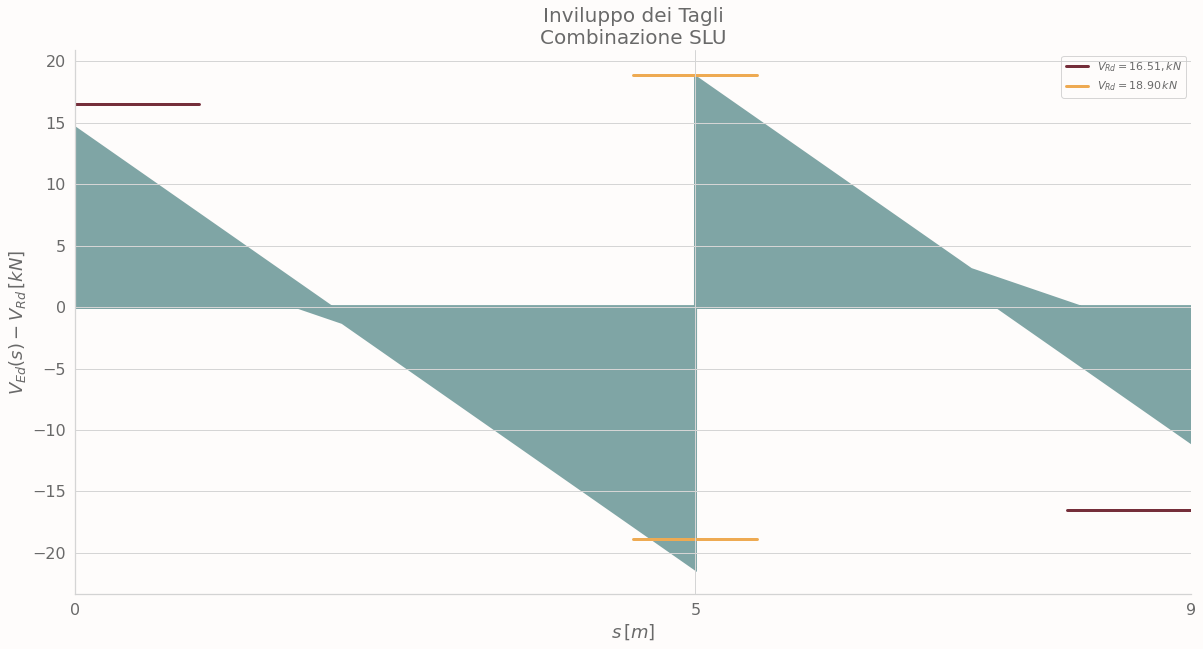

In [203]:
plt.figure(figsize=(20,10))
plt.fill(s, Tmax/2, linewidth='3', color='#7FA5A5')
plt.fill(s, Tmin/2, linewidth='3', color='#7FA5A5')

plt.plot([L[2],L[2]+1], VRdc[0]*np.ones(2), color='#752E3A', linewidth='3', label=r'$V_{Rd} = 16.51,kN$')
plt.plot([L[0]-.5,L[0]+.5], -VRdc[1]*np.ones(2), color='#EEAA52', linewidth='3', label=r'$V_{Rd} = 18.90\,kN$')
plt.plot([L[0]-.5,L[0]+.5], VRdc[2]*np.ones(2), color='#EEAA52', linewidth='3')
plt.plot([L[0]+L[1]-1,L[0]+L[1]], -VRdc[-1]*np.ones(2), color='#752E3A', linewidth='3',)

plt.xlim(s.min(), s.max())
plt.legend()
plt.grid()
plt.xlabel(r'$s\,[m]$')
plt.ylabel(r'$V_{Ed}(s) - V_{Rd}\,[kN]$')
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks(fontsize='16')
plt.title('Inviluppo dei Tagli\nCombinazione SLU')
plt.savefig('LaTeX/img/VEd-VRd_solaio_slu.pdf', bbox_inches='tight')

In [195]:
rho_l_NS2sx = min(1/(B*dc1) * As0[1], .02)
rho_l_NS2sx

0.003392920065876977

In [199]:
VRdc_NS2sx  = max(.18*min(1+(200/dc1)**(1/2), 2) * (100*rho_l_NS2sx*fck)**(1/3) /gammac * B*dc1, B*dc1*.035*min(1+(200/d)**(1/2), 2)*fck**(1/2))/1000
VRdc_NS2sx 

48.94584012795908

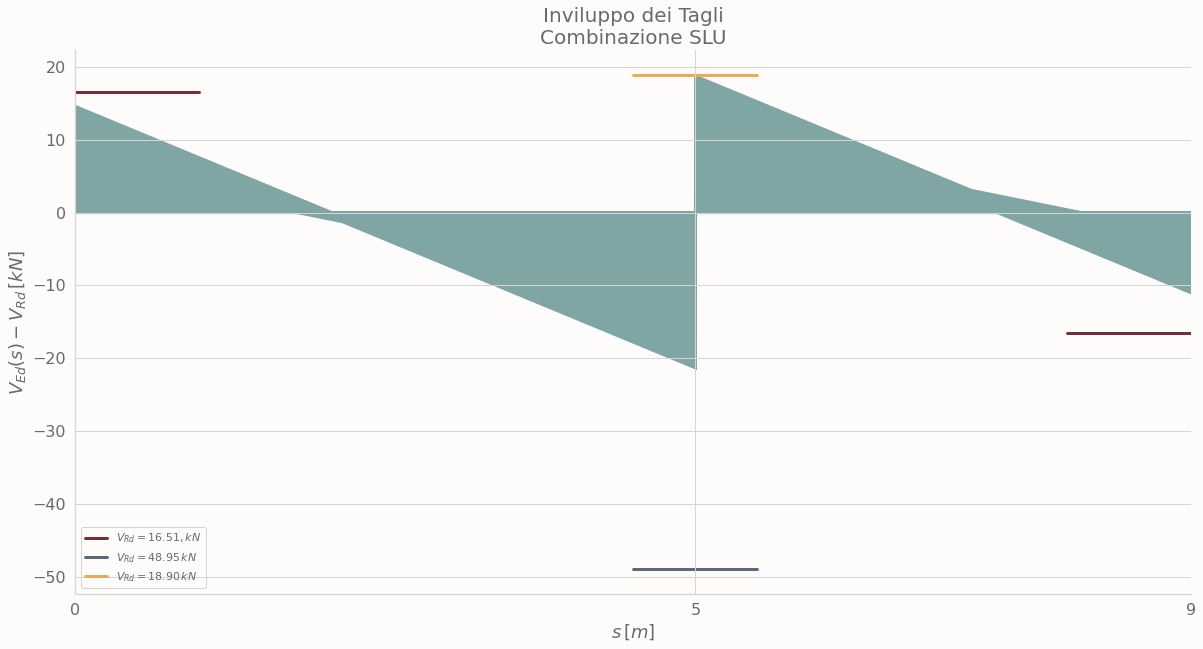

In [204]:
plt.figure(figsize=(20,10))
plt.fill(s, Tmax/2, linewidth='3', color='#7FA5A5')
plt.fill(s, Tmin/2, linewidth='3', color='#7FA5A5')

plt.plot([L[2],L[2]+1], VRdc[0]*np.ones(2), color='#752E3A', linewidth='3', label=r'$V_{Rd} = 16.51,kN$')
plt.plot([L[0]-.5,L[0]+.5], -VRdc_NS2sx*np.ones(2), color='#5B667F', linewidth='3', label=r'$V_{Rd} = 48.95\,kN$')
plt.plot([L[0]-.5,L[0]+.5], VRdc[2]*np.ones(2), color='#EEAA52', linewidth='3',label=r'$V_{Rd} = 18.90\,kN$')
plt.plot([L[0]+L[1]-1,L[0]+L[1]], -VRdc[-1]*np.ones(2), color='#752E3A', linewidth='3',)

plt.xlim(s.min(), s.max())
plt.legend(loc=0)
plt.grid()
plt.xlabel(r'$s\,[m]$')
plt.ylabel(r'$V_{Ed}(s) - V_{Rd}\,[kN]$')
plt.xticks([0, 5, 9], fontsize='16')
plt.yticks(fontsize='16')
plt.title('Inviluppo dei Tagli\nCombinazione SLU')
plt.savefig('LaTeX/img/VEd-VRd_solaio_corretto.pdf', bbox_inches='tight')